<a href="https://colab.research.google.com/github/knschuckmann/ColabProjects/blob/main/2021_08_11_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans algorithm briefly described 

---


## Colab Correct operation  
⛔️  you will need to copy this Notebook to your own Google drive account (otherwise everybody will be working on same copy and changing it)

1. Click on File in Menu 
2. Click on 'Save a copy in Drive' as shown below <br/>
![copy File][2] 

3. A new Tab will be created, so you can start running this script.

[2]: https://raw.githubusercontent.com/knschuckmann/4flow_bundesliga/master/pictures/Save.PNG


### ⚠️ How Colab works

1. Colab is an online [Jupyter Notebook](https://jupyter.org/index.html), which can be accessed without any further installation
2. By Connecting to a computation power source a new instance will be created. For now we will devote ourselves, that it works and not dive into details (click on connect in top right corner and wait to see RAM-Disk logo). <br/>
![runtime][6]
3. Clicking on the play Button in each Codefield, runs the code inside this Codefield. <br/>
![run_o][3] <br/>
Only if you hover on the area of the button you will be able to see the play button<br/> ![run_1][4]
4. After you ran a cell you will see a number on the field, marking the order of the running  process  <br/>
![run_1][5]
4. ### ⚠️ **Possible Errors**  
  1. It is essential to follow the order of this Notebook and **run the Code fields one after the other**. the numbers will tell you if you forgot to run a field. (Please dont skip code cells to run)

[6]: https://raw.githubusercontent.com/knschuckmann/4flow_bundesliga/master/pictures/Runtime.PNG
[3]: https://raw.githubusercontent.com/knschuckmann/4flow_bundesliga/master/pictures/Run_0.PNG
[4]: https://raw.githubusercontent.com/knschuckmann/ML_bundesliga_challange/a7e04265d0ee277b1d7143dcd20caeb17a1ba596/pictures/Hover_over.gif
[5]: https://raw.githubusercontent.com/knschuckmann/4flow_bundesliga/master/pictures/Run_2.PNG

## Verify results from presentation (START)

In [3]:
# import libraries 
!pip install -q mediapy
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import mediapy as media
import numpy as np
import pandas as pd

In [4]:
# define variables urls to images and print functions 
base_url = 'https://raw.githubusercontent.com/knschuckmann/ColabProjects/e05ba226f1a01e2a61dac94b46956656873ec36f/2021_08_11_KMeans/data/'
image_names = ['01_agshdgz.png', '13123_test_sawqe.png', 'big.png', 'one.png', 'simple.png', 'starategy_team.png', 'test_2.png']
# helper function
def check_appearance(name, dictionary, exception):
  try:
    return dictionary[name]
  except:
    return exception
# plot function
def display_data(X_data, Y_data,**kwargs):
  plt.scatter(X_data, Y_data, s = check_appearance('s', kwargs, 50), c=check_appearance('c', kwargs, 'blue'))
  plt.xlabel(xlabel = check_appearance('xlabel', kwargs, 'X'), size = check_appearance('size', kwargs, 10))
  plt.ylabel(ylabel = check_appearance('ylabel', kwargs, 'X'), size = check_appearance('size', kwargs, 10))
  plt.xticks(ticks=range(int(X_data.min()),int(X_data.max())))
  plt.show()

In [6]:
 # dummy data creation
 X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
grades = np.interp(X[:, 0], (X[:, 0].min(), X[:, 0].max()), (1, 6))
students = np.interp(X[:, 1], (X[:, 1].min(), X[:, 1].max()), (10, 30))

In [7]:
# display statistics of dummy data
df = pd.DataFrame(np.dstack([students, grades])[0])
df.describe()

,0,1
count,300.000000,300.000000
mean,19.421426,3.375052
std,5.162720,1.246946
min,10.000000,1.000000
25%,15.337774,2.237473
50%,18.548072,3.345959
75%,22.685116,4.472363
max,30.000000,6.000000


Display original data

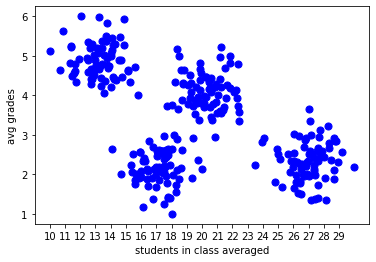

In [8]:
display_data(X_data=students, Y_data=grades, xlabel="students in class averaged", ylabel="avg grades", size=10, s=50)

Display classified data

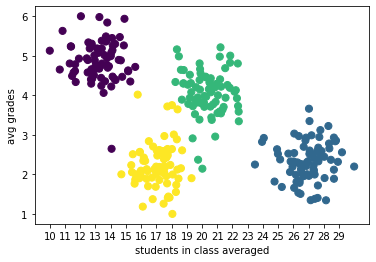

In [9]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(df)
display_data(X_data=students, Y_data=grades, c=kmeans.labels_, xlabel="students in class averaged", ylabel="avg grades", size=10)

Display test images


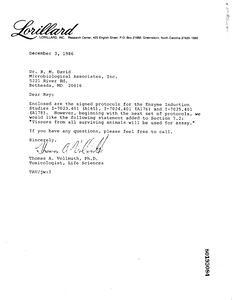
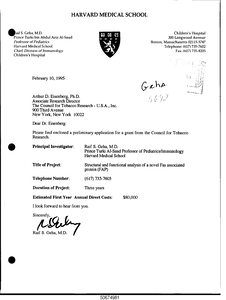
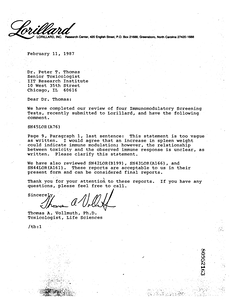
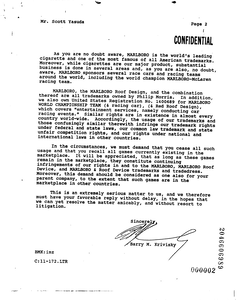
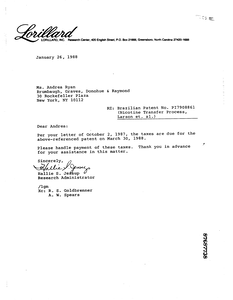
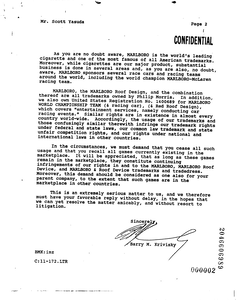
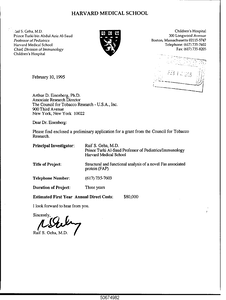

In [10]:
images = []
for nr, name in enumerate(image_names, start=1):
  images.append(media.read_image(base_url + name))
  
media.show_images(images, columns=3, height=300)

Prepare images for KMeans algorithm

In [11]:
images = []
for nr, name in enumerate(image_names, start=1):
    image = media.read_image(base_url + name)
    # resize images to same dimension and reshape for kmeans algorithm
    image = media.resize_image(image,(1200, 1575))
    image_np = np.array(image).reshape(1,-1)
    images.append(image_np[0])
# stack all images together
images_stacked = np.vstack(images)

# Principal component analysis for faster computation
pca = PCA(6)
converted_data = pca.fit_transform(images_stacked)

# Run KMeans algorithm with exact 3 clusters to find  
kmeans = KMeans(n_clusters= 3)
kmeans.fit(converted_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
# put classiefied images into 3 different lists so displaying is easier
class_0, class_1, class_2 = [], [], [] 
switcher = {0: lambda x: class_0.append(x), 1: lambda x: class_1.append(x), 2: lambda x: class_2.append(x)}
for label, name in zip(kmeans.labels_,image_names):
    switcher[label](name)

Plot classified images in different rows 

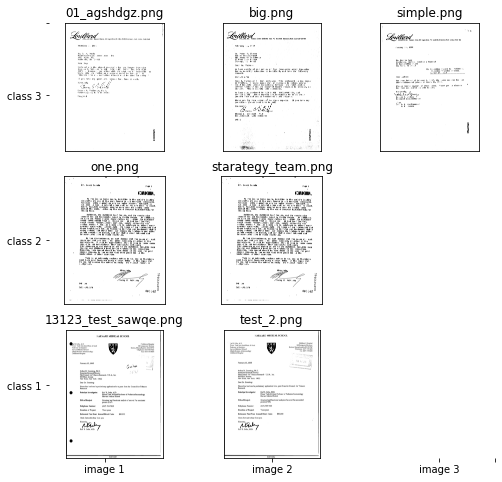

In [14]:
# create figure with 3 rows and columns and get rid of box arround the plot
columns, rows = 3, 3
fig = plt.figure(figsize=(8, 8))
plt.xticks(ticks =[0.5,2,3.5,4], labels=['image 1', 'image 2', 'image 3', ''])
plt.yticks(ticks = [0.5,1.5,2.5,3], labels= ['class 1', 'class 2', 'class 3', ''])
for spine in plt.gca().spines.values():
  spine.set_visible(False)

# plot each image with respect to the belonging class
count = 0
for class_nr in [class_0, class_1, class_2]:
  for image_name in class_nr:
    count += 1
    img = media.read_image(base_url + image_name)
    img = media.to_rgb(img)
    # create subplots -> each row different class
    ax = fig.add_subplot(rows, columns, count)
    ax.title.set_text(image_name)
    # get rid of boxes in subplots
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    # plot subplot
    plt.imshow(img)
  # distinguish rows for different classes 
  if not (count % 3 == 0):
    count += (count % 3 - 1)

plt.show()